In [1]:
import pickle

# Define the path to the .pkl file
input_path = "/data/sr933/scRCC/combined_data/RCC_data_dict.pkl"

# Load the dictionary from the .pkl file
with open(input_path, "rb") as f:
    data_dict = pickle.load(f)

# Access the contents of the dictionary
X_combined = data_dict["X"].T
y_labels = data_dict["y"]
gene_list = data_dict["Genes"]

In [2]:
from sklearn.model_selection import train_test_split
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_labels, test_size=0.2, random_state=42, stratify=y_labels)


In [3]:
# Set all elements >= 1 to 1
y_train[y_train >= 1] = 1
y_test[y_test >= 1] = 1
##Do SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
def data_smote(x,y):
    oversample = SMOTE()
    x_new, y_new = oversample.fit_resample(x, y)

    counter_old = Counter(y)
    print(counter_old)
    counter = Counter(y_new)
    print(counter)

    #Make features binary
    x_new=np.rint(x_new)
    return x_new, y_new

X_smote, y_smote= data_smote(X_train, y_train)


Counter({np.int64(1): 206742, np.int64(0): 11548})
Counter({np.int64(1): 206742, np.int64(0): 206742})


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb


# Initialize the LGBMClassifier with binary classification settings
clf = lgb.LGBMClassifier(objective='binary', num_leaves=31, learning_rate=0.1, n_estimators=10000)

# Step 3: Train the model
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 206742, number of negative: 11548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 81.824291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107629
[LightGBM] [Info] Number of data points in the train set: 218290, number of used features: 12206
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.947098 -> initscore=2.884959
[LightGBM] [Info] Start training from score 2.884959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[[ 2872    15]
 [   12 51674]]


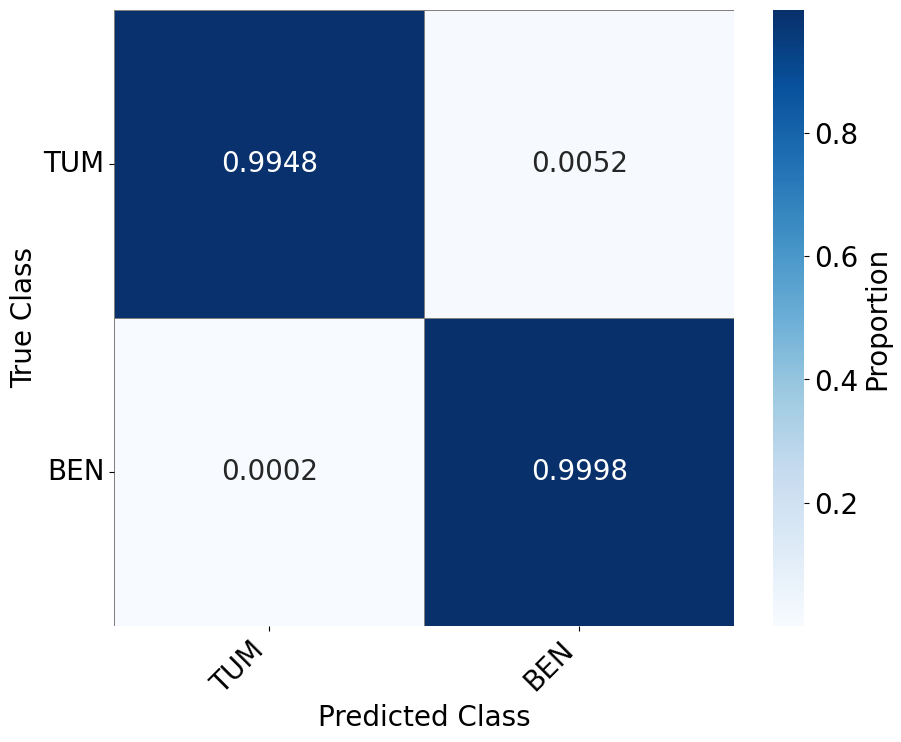

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
classes=["TUM", "BEN"]
df_cm = pd.DataFrame(cm / np.sum(cm, axis=1)[:, None], index=classes, columns=classes)

plt.figure(figsize = (10,8))
# Create the heatmap with additional customization
heatmap = sn.heatmap(df_cm, annot=True, fmt=".4f", cmap="Blues", linewidths=0.5, linecolor='gray', 
            cbar_kws={'label': 'Proportion'}, annot_kws={"size": 20})

# Set the color bar label font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Proportion', fontsize=20)

# Axis labels and title
plt.ylabel("True Class", fontsize=20)
plt.xlabel("Predicted Class", fontsize=20)

# Ensure that axis labels are clearly visible
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
save_path = "/home/sr933/output/binary_cm_train.svg"  # Replace with your desired file path
plt.savefig(save_path, format="svg", bbox_inches="tight")